In [9]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

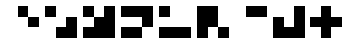

In [10]:
# Generate white noise samples

alphabet_len = 9
im_size = (3, 3)
np.random.seed(42)

white_noise_dataset = np.random.randint(0, 2, 
                                        size=(alphabet_len, im_size[0] * im_size[1]), 
                                        dtype='int') * 2 - 1

for i in range(alphabet_len):
    ax = plt.subplot(1, alphabet_len, i + 1)
    uti.show_letter(white_noise_dataset[i], ax)


The number of memory patterns to be stored is > 14%% of the model size. This may lead to problems.ref: https://doi.org/10.3389/fncom.2016.00144
0 True 0
77
1 True 0
71
2 True 0
73
3 True 0
70
4 True 0
71
5 True 0
80
6 True 0
77
7 True 0
74
8 True 0
74


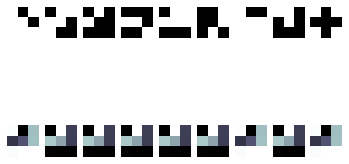

In [35]:
hop_net = hopfield.HopfieldNetwork()
hop_net.run(white_noise_dataset, "hebbian", "sync_tanh", 1000)

In [36]:
# # Train the Hopfield net

# hop_net = hopfield.HopfieldNetwork()
# hop_net.TS_hebbian(white_noise_dataset)

# noise_level = .0
# n_test_samples = 3
# n_iter = 1000
# n_images = len(white_noise_dataset)
# for i in range(n_test_samples):
#     # add noise
#     # random_idx = np.random.randint(0, n_images)
#     random_idx = i % n_images
#     x_test = white_noise_dataset[random_idx].copy()
#     x_test = uti.add_noise(x_test, noise_level=noise_level)
#     Xs = hop_net.inference_step(x_test, 10)
#     is_correct, error = hop_net._validate(x_test, random_idx)
#     print(random_idx, is_correct, error)

#     ax = plt.subplot(n_test_samples, 2, i * 2 + 1)
#     uti.show_letter(x_test, ax)
#     ax = plt.subplot(n_test_samples, 2, i * 2 + 2)
#     uti.show_letter(Xs[-1], ax)
#     # print(x_test.dtype, Xs[-1].dtype)


In [37]:
def sync_tanh(X, weights, gradient=1, threshold=0):
    ws = weights.dot(X)
    return np.tanh(gradient * (ws - threshold))

def async_n_tanh(X, weights, n_choices=None, gradient=1, threshold=0):
    X = X.astype("float")
    if n_choices == None:
        n_choices = len(X)
    elif n_choices >= len(X):
        n_choices = len(X)

    idx = np.random.choice(len(X), size=n_choices, replace=False)
    idx_weights = np.zeros((len(idx), 2))

    for n, i in enumerate(idx):
        idx_weights[n][0] = i
        idx_weights[n][1] = np.sum(X * weights[i])

    for i_w in idx_weights:
        new_weight = np.tanh(gradient * (i_w[1] - threshold))
        X[int(i_w[0])] = new_weight
    # print(X)
    return X

In [38]:
X = np.array([1, -1, 1])
weights = np.array([[0, 1, 2],
                    [3, 0, 4],
                    [5, 6, 0]])

In [39]:
print(sync_tanh(X.copy(), weights))
print("-----")
print(async_n_tanh(X.copy(), weights))

[ 0.76159416  0.99999834 -0.76159416]
-----
[ 0.76159416  0.99999834 -0.76159416]


In [40]:
X = np.array([1, 1, 1])
weights = np.array([[0, 1, 2],
                    [3, 0, 4],
                    [5, 6, 0]])

prod1 = np.dot(X, weights)
prod2 = weights.dot(X)
print(X)
print(weights)
print("-----------")
print(prod1)
print(prod2)

[1 1 1]
[[0 1 2]
 [3 0 4]
 [5 6 0]]
-----------
[8 7 6]
[ 3  7 11]
